In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Decision Tree

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=0)

In [5]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [6]:
dtree.score(X_train, y_train)

1.0

In [7]:
dtree.score(X_test, y_test)

0.9020979020979021

In [8]:
# vis.
import pydotplus 
# conda install python-graphviz

dot_data = tree.export_graphviz(dtree,
                                feature_names=cancer.feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('tree.png')

True

![img_tree](tree.png)

In [9]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)

In [10]:
tree4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [11]:
tree4.score(X_train, y_train)

0.9859154929577465

In [12]:
tree4.score(X_test, y_test)

0.9090909090909091

In [13]:
dot_data = tree.export_graphviz(tree4,
                                feature_names=cancer.feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('tree4.png')

True

![img_tree](tree4.png)

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)

In [17]:
print(tree.score(X_train, y_train)) # R-sqaured
print(tree.score(X_test, y_test)) # R-sqaured

1.0
0.6684584994323013


In [18]:
pred_tree = tree.predict(X_test)

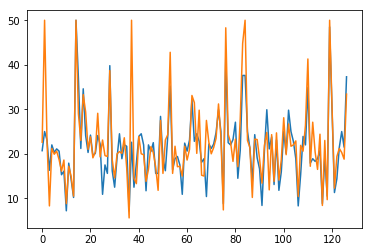

In [19]:
pd.Series(pred_tree).plot()
pd.Series(y_test).plot()

In [20]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)

In [21]:
print(linear_reg.score(X_train, y_train)) # R-sqaured
print(linear_reg.score(X_test, y_test)) # R-sqaured

0.769744837056394
0.6353620786674667


In [22]:
pred_lr = linear_reg.predict(X_test)

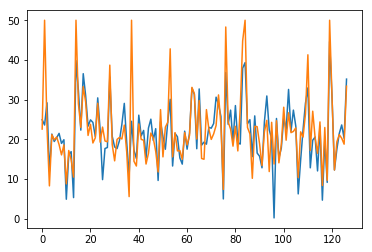

In [23]:
pd.Series(pred_lr).plot()
pd.Series(y_test).plot()

In [24]:
# rmse
from sklearn.metrics import mean_squared_error

print("tree's RMSE:", mean_squared_error(pred_tree, y_test))
print("linear's RMSE:", mean_squared_error(pred_lr, y_test))

("tree's RMSE:", 27.086614173228345)
("linear's RMSE:", 29.79055916423812)


### Random Forest

In [25]:
df = pd.read_csv("titanic.csv", index_col=0)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [27]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,13.00,S
888,1,1,female,19.0,0,0,30.00,S
889,0,3,female,NaN,1,2,23.45,S
890,1,1,male,26.0,0,0,30.00,C
891,0,3,male,32.0,0,0,7.75,Q


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [29]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [31]:
df.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [32]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [33]:
df.groupby("Survived").mean().T

Survived,0,1
Pclass,2.485849,1.878472
Age,30.626179,28.193299
SibSp,0.525943,0.496528
Parch,0.365566,0.531250
Fare,22.965456,51.647672


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [35]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,'Pclass':], df['Survived'], random_state=0)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(534, 7)
(534,)
(178, 7)
(178, 7)


In [39]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=11)

In [40]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=11,
            verbose=0, warm_start=False)

In [41]:
forest.score(X_train, y_train) # accuracy

0.9925093632958801

In [42]:
forest.score(X_test, y_test) # accuracy

0.7865168539325843

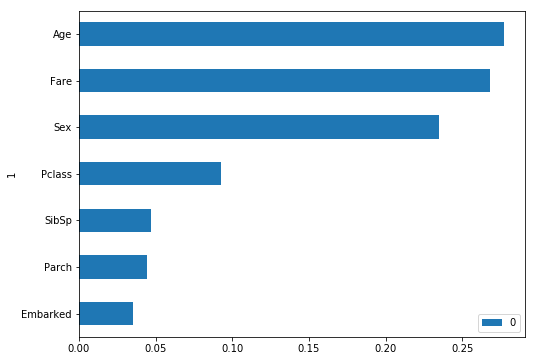

In [43]:
pd.DataFrame(zip(forest.feature_importances_, X_test.columns)).set_index(1).sort_values(0).plot(kind='barh', figsize=(8,6))

### Gradient Boosting Tree

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,'Pclass':], df['Survived'], random_state=11)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

grbt = GradientBoostingClassifier(random_state=0)

In [46]:
grbt.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [47]:
grbt.score(X_train, y_train) # accuracy

0.9138576779026217

In [48]:
grbt.score(X_test, y_test) # accuracy

0.8370786516853933

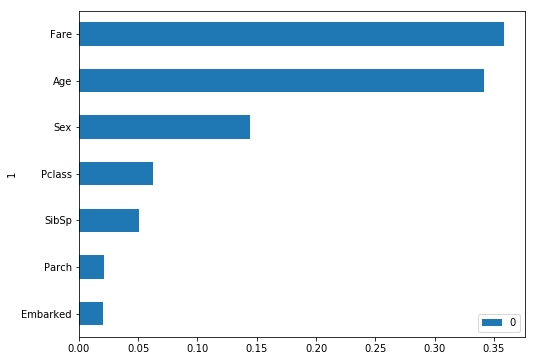

In [49]:
pd.DataFrame(zip(grbt.feature_importances_, X_test.columns)).set_index(1).sort_values(0).plot(kind='barh', figsize=(8,6))

### SVC

In [50]:
from sklearn.svm import SVC

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,'Pclass':], df['Survived'], random_state=98)

In [52]:
svc = SVC()

In [53]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
svc.score(X_train, y_train)  # accuracy

0.9119850187265918

In [55]:
svc.score(X_test, y_test)  # accuracy

0.6797752808988764

In [56]:
svc = SVC(C=1000, gamma=0.01)

In [57]:
svc.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
svc.score(X_train, y_train) # accuracy

0.949438202247191

In [59]:
svc.score(X_test, y_test) # accuracy

0.702247191011236

### Neural Network

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,'Pclass':], df['Survived'], random_state=98)

In [62]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

# solver, adam(default): 가장 일반적이고 대부분 잘 작동하지만 scale에 민감
# solver, lbfgs: 안정적이며 scale에 덜 민감

In [63]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
mlp.score(X_train, y_train) # accuracy

0.8052434456928839

In [65]:
mlp.score(X_test, y_test) # accuracy

0.7696629213483146

In [66]:
mlp_tanh = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0).fit(X_train, y_train)

In [67]:
mlp_tanh.score(X_train, y_train)

0.8689138576779026

In [68]:
mlp_tanh.score(X_test, y_test) # accuracy

0.7471910112359551

In [69]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, alpha=0.1, hidden_layer_sizes=1000).fit(X_train, y_train)

In [70]:
mlp.score(X_test, y_test) # accuracy

0.7696629213483146